In [2]:
import pandas as pd # wtf!!!!!!
from pathlib import Path
import os
from collections import Counter
import re

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import plotly.express as px


CODE_REPO = "company_da_codes"

def read_code(repo = CODE_REPO):
    data_root = Path(repo)
    texts = []

    for root, dirs, files in os.walk(data_root):
        for f in files:
            if f.endswith(".py"):
                text = open(Path(root)/ f,'r').read().split('\n')
                texts += [t.strip() for t in text]

    texts = [t for t in texts if len(t) > 0]
    return texts

def find_dataframe_ops(s):
    return re.findall(r"(df\.\w+)\(", s)

def find_pandas_ops(s):
    return re.findall(r"(pd\.\w+)\(", s)

def find_join_table(s):
    return re.findall(r"(\w+DfSequence)", s)

def find_row_col_selection(s):
    return re.findall(r"(df\.loc)\[", s) \
        + re.findall(r"(df\.iloc)\[", s) \
        + re.findall(r"(df\.ix)\[", s) \
        + re.findall(r"(df\[)", s)

def parse_codes(texts):
    ops = []
    for line in texts:
        ops += find_dataframe_ops(line)
        ops += find_pandas_ops(line)
        ops += len(find_join_table(line)) * ["pd.merge"]
        ops += len(find_row_col_selection(line)) * ["df.loc"]
    
    ops = pd.DataFrame(Counter(ops).most_common(), columns = ['op','op_count'])
    return ops

Totally 40723 lines of python code analyzed.


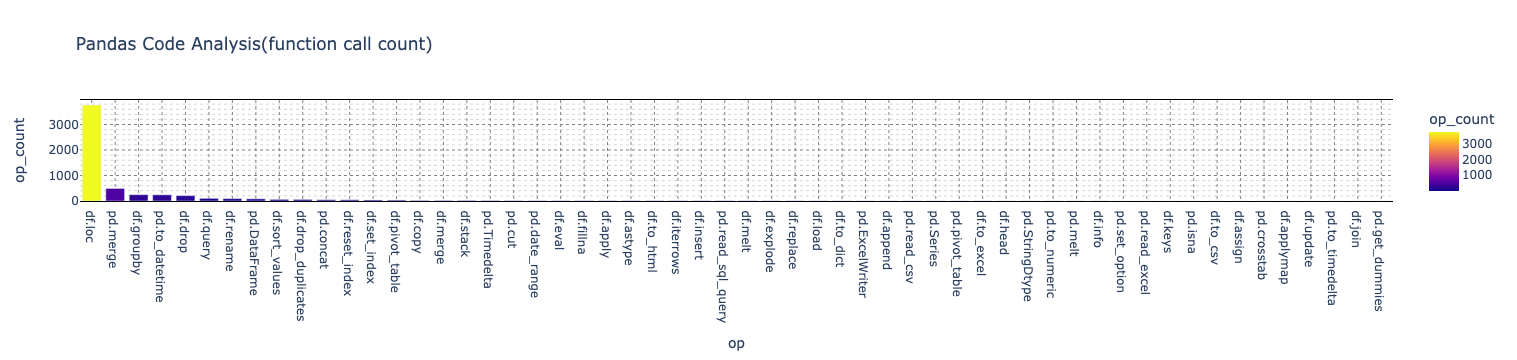

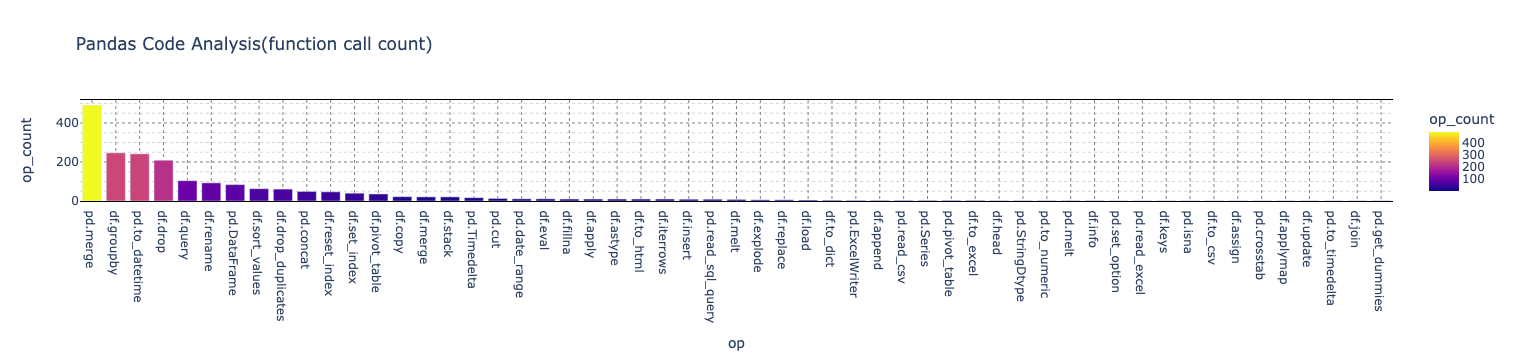

In [8]:
texts = read_code()
summary = parse_codes(texts)

print(f"Totally {len(texts)} lines of python code analyzed.")

fig = px.bar(summary, x = 'op', y = 'op_count', title = 'Pandas Code Analysis(function call count)', color = 'op_count')
fig.update_layout(paper_bgcolor = 'white', plot_bgcolor = 'rgba(0,0,0,0)')
fig.update_xaxes(showgrid = True, gridcolor = 'gray', griddash = 'dot', minor_griddash = 'dot', showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showgrid = True, gridcolor = 'gray', griddash = 'dot', minor_griddash = 'dot')
fig.show()

fig = px.bar(summary.iloc[1:], x = 'op', y = 'op_count', title = 'Pandas Code Analysis(function call count)', color = 'op_count')

fig.update_layout(paper_bgcolor = 'white', plot_bgcolor = 'rgba(0,0,0,0)')
fig.update_xaxes(showgrid = True, gridcolor = 'gray', griddash = 'dot', minor_griddash = 'dot', showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showgrid = True, gridcolor = 'gray', griddash = 'dot', minor_griddash = 'dot')
fig.show()

In [6]:
def import_package_counts(package_name):
    cnt = len([t for t in texts if re.search(package_name,t)])
    return [cnt]

package_list = ['sklearn','scipy','statsmodels','xgboost','prophet','pmdarima','tensorflow','predict','numpy','write_to_database','datetime','excel','csv','email']
data = {package: import_package_counts(package) for package in package_list}
import_package_summary = pd.DataFrame(data)
import_package_summary.style.background_gradient(axis = 1)

,sklearn,scipy,statsmodels,xgboost,prophet,pmdarima,tensorflow,predict,numpy,write_to_database,datetime,excel,csv,email
0,4,0,0,0,0,0,0,6,91,281,903,36,40,657
